In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly as pt
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

Dataset columns are as follows:

■ id - ID

■ battery_power - Total energy a battery can store in one time measured in mAh

■ blue - Has Bluetooth or not

■ clock_speed - The speed at which the microprocessor executes instructions

■ dual_sim - Has dual sim support or not

■ fc - Front Camera megapixels

■ four_g - Has 4G or not

■ int_memory - Internal Memory in Gigabytes

■ m_dep - Mobile Depth in cm

■ mobile_wt - Weight of mobile phone

■ n_cores - Number of cores of the processor

■ pc - Primary Camera megapixels

■ px_height - Pixel Resolution Height

■ px_width - Pixel Resolution Width

■ ram - Random Access Memory in Megabytes

■ sc_h - Screen Height of mobile in cm

■ sc_w - Screen Width of mobile in cm

■ talk_time - longest time that a single battery charge will last when you are

■ three_g - Has 3G or not

■ touch_screen - Has touch screen or not

■ wifi - Has wifi or not

■ price_range - This is the target variable with the value of:

*   0 (low cost)
*   1 (medium cost)
*   2 (high cost)
*   3 (very high cost)

In [8]:
FOLDER_PATH = Path("/content/drive/MyDrive/maids AI test/")
train = pd.read_csv(FOLDER_PATH.joinpath("train.csv"))
test = pd.read_csv(FOLDER_PATH.joinpath("test.csv"))

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [11]:
train.price_range.value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

we note that the data is balanced dataset

In [13]:
train[(train.price_range == 1) & (train.ram.isna())]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
261,728,0,2.7,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,1.0,12,1,1,1,1
341,811,1,2.4,1,5.0,1.0,2.0,0.3,106.0,6.0,...,NaN,NaN,NaN,NaN,NaN,2,1,0,1,1


In [14]:
train.groupby("price_range")["ram"].agg({"min","max","median","mean","count"}).reset_index()

,price_range,count,min,median,mean,max
0,0,500,256.0,719.5,785.314000,1974.0
1,1,498,387.0,1680.5,1677.901606,2811.0
2,2,500,1185.0,2577.0,2582.816000,3916.0
3,3,500,2259.0,3509.5,3449.232000,3998.0


drop blue

In [15]:
train[train.ram <= 1000].ram.value_counts()

ram
594.0    3
315.0    3
606.0    3
595.0    3
348.0    3
        ..
282.0    1
277.0    1
676.0    1
286.0    1
668.0    1
Name: count, Length: 322, dtype: int64

In [16]:
train.touch_screen.value_counts()

touch_screen
1    1006
0     994
Name: count, dtype: int64

In [17]:
ram_dict = {(0,350):256 , (351,750):512, (751,1500):1000, (1501,2500):2000, (2501,3500):3000, (3501,4500):4000}
def ram_bins (df:pd.DataFrame, ram_dict)-> None:
  for key in ram_dict.keys():
    df.loc[df.ram.between(key[0], key[1]) , 'ram'] = ram_dict[key]
#ram_bins(train, ram_dict)
print(train.ram.value_counts())

ram
1464.0    4
3142.0    4
2610.0    4
2227.0    4
1229.0    4
         ..
2297.0    1
2312.0    1
2167.0    1
3508.0    1
3919.0    1
Name: count, Length: 1561, dtype: int64


In [18]:
def explore_the_data(df:pd.DataFrame, target:str)->None:
  for col in df.columns.difference([target]):
    print(f"--------------------------------------- {col} ---------------------------------------")
    print("The number of unique values: ", train[col].unique().size)
    if len(train[train[col] == 0]) != 0 and train[col].unique().size > 2:
      print("There are zero values: ", len(train[train[col] == 0]))
      display(train[train[col] == 0])
explore_the_data(train,"price_range")

--------------------------------------- battery_power ---------------------------------------
The number of unique values:  1094
--------------------------------------- blue ---------------------------------------
The number of unique values:  2
--------------------------------------- clock_speed ---------------------------------------
The number of unique values:  26
--------------------------------------- dual_sim ---------------------------------------
The number of unique values:  2
--------------------------------------- fc ---------------------------------------
The number of unique values:  21
There are zero values:  471


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
7,1954,0,0.5,1,0.0,0.0,24.0,0.8,187.0,4.0,...,512.0,1149.0,700.0,16.0,3.0,5,1,1,1,0
8,1445,1,0.5,0,0.0,0.0,53.0,0.7,174.0,7.0,...,386.0,836.0,1099.0,17.0,1.0,20,1,0,0,0
10,769,1,2.9,1,0.0,0.0,9.0,0.1,182.0,5.0,...,248.0,874.0,3946.0,5.0,2.0,7,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971,538,0,1.1,1,0.0,1.0,25.0,0.3,163.0,7.0,...,455.0,537.0,2215.0,9.0,3.0,17,1,1,1,1
1984,797,0,2.2,1,0.0,0.0,37.0,0.9,144.0,7.0,...,206.0,1167.0,2216.0,9.0,5.0,6,1,0,0,1
1993,1467,1,0.5,0,0.0,0.0,18.0,0.6,122.0,5.0,...,888.0,1099.0,3962.0,15.0,11.0,5,1,1,1,3
1995,794,1,0.5,1,0.0,1.0,2.0,0.8,106.0,6.0,...,1222.0,1890.0,668.0,13.0,4.0,19,1,1,0,0


--------------------------------------- four_g ---------------------------------------
The number of unique values:  3
There are zero values:  955


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
5,1859,0,0.5,1,3.0,0.0,22.0,0.7,164.0,1.0,...,1004.0,1654.0,1067.0,17.0,1.0,10,1,0,0,1
7,1954,0,0.5,1,0.0,0.0,24.0,0.8,187.0,4.0,...,512.0,1149.0,700.0,16.0,3.0,5,1,1,1,0
8,1445,1,0.5,0,0.0,0.0,53.0,0.7,174.0,7.0,...,386.0,836.0,1099.0,17.0,1.0,20,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,586,0,2.8,0,2.0,0.0,15.0,0.2,83.0,3.0,...,241.0,854.0,2592.0,12.0,8.0,3,0,0,0,1
1992,674,1,2.9,1,1.0,0.0,21.0,0.2,198.0,3.0,...,576.0,1809.0,1180.0,6.0,3.0,4,1,1,1,0
1993,1467,1,0.5,0,0.0,0.0,18.0,0.6,122.0,5.0,...,888.0,1099.0,3962.0,15.0,11.0,5,1,1,1,3
1994,858,0,2.2,0,1.0,0.0,50.0,0.1,84.0,1.0,...,528.0,1416.0,3978.0,17.0,16.0,3,1,1,0,3


--------------------------------------- int_memory ---------------------------------------
The number of unique values:  64
--------------------------------------- m_dep ---------------------------------------
The number of unique values:  11
--------------------------------------- mobile_wt ---------------------------------------
The number of unique values:  122
--------------------------------------- n_cores ---------------------------------------
The number of unique values:  9
--------------------------------------- pc ---------------------------------------
The number of unique values:  22
There are zero values:  100


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
7,1954,0,0.5,1,0.0,0.0,24.0,0.8,187.0,4.0,...,512.0,1149.0,700.0,16.0,3.0,5,1,1,1,0
33,1310,1,2.2,1,0.0,1.0,51.0,0.6,100.0,4.0,...,178.0,1919.0,3845.0,7.0,0.0,12,1,1,0,3
52,1654,1,1.5,1,0.0,1.0,43.0,0.3,109.0,2.0,...,546.0,629.0,3112.0,12.0,5.0,10,1,1,0,3
54,1073,1,0.5,1,0.0,0.0,51.0,0.5,145.0,7.0,...,690.0,804.0,2908.0,6.0,0.0,18,0,1,0,2
62,1156,1,1.2,1,0.0,1.0,50.0,0.8,159.0,2.0,...,322.0,547.0,470.0,7.0,0.0,15,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1906,1807,0,0.8,1,0.0,1.0,38.0,0.2,97.0,8.0,...,1332.0,1814.0,1069.0,7.0,6.0,7,1,0,0,1
1911,1259,0,1.2,1,0.0,0.0,13.0,0.5,97.0,2.0,...,1210.0,1989.0,340.0,17.0,13.0,4,1,0,1,0
1931,1854,0,0.9,1,0.0,1.0,33.0,0.4,195.0,1.0,...,665.0,718.0,1675.0,14.0,12.0,9,1,0,1,1
1968,1667,0,1.0,1,0.0,1.0,21.0,0.9,138.0,2.0,...,1211.0,1396.0,635.0,17.0,7.0,15,1,0,0,0


--------------------------------------- px_height ---------------------------------------
The number of unique values:  1136
There are zero values:  2


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1481,1834,0,2.1,0,7.0,1.0,40.0,0.1,99.0,4.0,...,0.0,1987.0,3692.0,13.0,0.0,16,1,1,0,3
1933,897,1,2.0,0,3.0,1.0,2.0,0.6,154.0,8.0,...,0.0,994.0,1958.0,7.0,5.0,7,1,1,0,1


--------------------------------------- px_width ---------------------------------------
The number of unique values:  1110
--------------------------------------- ram ---------------------------------------
The number of unique values:  1562
--------------------------------------- sc_h ---------------------------------------
The number of unique values:  16
--------------------------------------- sc_w ---------------------------------------
The number of unique values:  20
There are zero values:  180


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
12,1815,0,2.8,0,2.0,0.0,33.0,0.6,159.0,4.0,...,607.0,748.0,1482.0,18.0,0.0,2,1,0,0,1
24,503,0,1.2,1,5.0,1.0,8.0,0.4,111.0,3.0,...,201.0,1245.0,2583.0,11.0,0.0,12,1,0,0,1
33,1310,1,2.2,1,0.0,1.0,51.0,0.6,100.0,4.0,...,178.0,1919.0,3845.0,7.0,0.0,12,1,1,0,3
42,1253,1,0.5,1,5.0,1.0,5.0,0.2,152.0,2.0,...,685.0,714.0,1878.0,15.0,0.0,4,1,1,0,1
50,1547,1,3.0,1,2.0,1.0,14.0,0.7,198.0,3.0,...,1042.0,1832.0,2059.0,5.0,0.0,15,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,772,0,1.0,1,0.0,1.0,23.0,0.6,97.0,7.0,...,317.0,1805.0,2782.0,7.0,0.0,17,1,0,0,2
1920,591,1,0.5,1,1.0,1.0,16.0,0.9,90.0,6.0,...,892.0,1603.0,3746.0,5.0,0.0,5,1,1,0,3
1946,590,1,1.2,1,0.0,0.0,32.0,0.4,141.0,6.0,...,227.0,509.0,1817.0,10.0,0.0,6,0,1,0,0
1954,686,1,2.7,1,0.0,0.0,36.0,0.1,194.0,4.0,...,64.0,745.0,1503.0,10.0,0.0,13,0,0,0,0


--------------------------------------- talk_time ---------------------------------------
The number of unique values:  19
--------------------------------------- three_g ---------------------------------------
The number of unique values:  2
--------------------------------------- touch_screen ---------------------------------------
The number of unique values:  2
--------------------------------------- wifi ---------------------------------------
The number of unique values:  2


Fix the zero value in the "px_height"

In [19]:
train.px_height.replace(0,np.NaN, inplace=True)
train.sc_w.replace(0,np.NaN, inplace=True)
display(train.iloc[12])

battery_power    1815.0
blue                0.0
clock_speed         2.8
dual_sim            0.0
fc                  2.0
four_g              0.0
int_memory         33.0
m_dep               0.6
mobile_wt         159.0
n_cores             4.0
pc                 17.0
px_height         607.0
px_width          748.0
ram              1482.0
sc_h               18.0
sc_w                NaN
talk_time           2.0
three_g             1.0
touch_screen        0.0
wifi                0.0
price_range         1.0
Name: 12, dtype: float64

In [20]:
cheak =["fc", "four_g", "m_dep","mobile_wt","n_cores","pc","px_height","px_width","ram","sc_h","sc_w"]
train.loc[train.int_memory.isna(),cheak]

,fc,four_g,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w
157,NaN,NaN,NaN,NaN,NaN,NaN,747.0,826.0,506.0,10.0,NaN
158,NaN,NaN,NaN,NaN,NaN,NaN,1612.0,1983.0,3702.0,17.0,NaN
261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0
276,NaN,NaN,0.8,126.0,4.0,13.0,32.0,1509.0,3760.0,9.0,5.0
371,NaN,NaN,NaN,NaN,NaN,18.0,481.0,749.0,2261.0,7.0,6.0


In [21]:
target = "price_range"
X = train.drop([target], axis =1)
y = train[target]

In [22]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X = std.fit_transform(X)
imputer = KNNImputer()
X = pd.DataFrame(imputer.fit_transform(X),columns = train.columns.difference([target]))


In [23]:
train[train.columns.difference([target])] = X
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.902597,-0.990050,0.830779,-1.019184,-0.763673,-1.043554,-1.380676,0.338851,1.349325,-1.100361,...,-1.411522,-1.145850,0.391463,-0.784470,0.159681,1.462493,-1.786861,-1.006018,0.986097,1
1,-0.495139,1.010051,-1.253064,0.981177,-0.994370,0.958264,1.154887,0.685522,-0.120606,-0.663369,...,0.586239,1.704387,0.467039,1.115173,-0.803702,-0.734267,0.559641,0.994018,-1.014099,2
2,-1.537686,1.010051,-1.253064,0.981177,-0.532975,0.958264,0.493436,1.378865,0.133805,0.210614,...,1.394373,1.075114,0.441232,-0.309559,-1.044548,-0.368140,0.559641,0.994018,-1.014099,2
3,-1.419319,1.010051,1.198517,-1.019184,-0.994370,-1.043554,-1.215313,1.032194,-0.261945,0.647606,...,1.288277,1.237059,0.594227,0.877717,0.400527,-0.002014,0.559641,-1.006018,-1.014099,2
4,1.325906,1.010051,-0.395011,-1.019184,2.004698,0.958264,0.658799,0.338851,0.020734,-1.100361,...,1.270218,-0.090892,-0.657384,-1.021925,-1.044548,0.730240,0.559641,0.994018,-1.014099,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,1.010051,-1.253064,0.981177,-0.994370,0.958264,-1.656281,1.032194,-0.968643,0.647606,...,1.301821,1.477663,-1.342175,0.165352,-0.562856,1.462493,0.559641,0.994018,-1.014099,0
1996,1.653694,1.010051,1.321096,0.981177,-0.994370,-1.043554,0.383194,-1.047833,1.321057,-0.226378,...,0.608813,1.651176,-0.085034,-0.309559,0.882219,0.913303,0.559641,0.994018,0.986097,2
1997,1.530773,-0.990050,-0.762748,0.981177,-0.763673,0.958264,0.217831,0.685522,-0.912107,1.521590,...,0.502717,0.880779,0.859665,-0.784470,-1.285394,-1.100394,0.559641,0.994018,-1.014099,3
1998,0.622527,-0.990050,-0.762748,-1.019184,-0.071580,0.958264,0.769041,-1.394504,0.133805,0.210614,...,-0.698197,-1.344812,-1.156922,1.352628,0.882219,1.462493,0.559641,0.994018,0.986097,0


In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   float64
 1   blue           2000 non-null   float64
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   float64
 4   fc             2000 non-null   float64
 5   four_g         2000 non-null   float64
 6   int_memory     2000 non-null   float64
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   float64
 9   n_cores        2000 non-null   float64
 10  pc             2000 non-null   float64
 11  px_height      2000 non-null   float64
 12  px_width       2000 non-null   float64
 13  ram            2000 non-null   float64
 14  sc_h           2000 non-null   float64
 15  sc_w           2000 non-null   float64
 16  talk_time      2000 non-null   float64
 17  three_g        2000 non-null   float64
 18  touch_sc

In [25]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2000.000000
mean,2.149392e-16,-1.243450e-17,-1.545430e-16,8.082424e-17,0.001044,-0.000807,-0.000062,0.000431,0.000030,0.000290,...,-0.000711,0.000152,0.000325,-0.000440,-0.011247,1.421085e-16,1.421085e-17,-5.417888e-17,1.421085e-17,1.500000
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,0.999337,0.999322,0.999019,0.999139,0.999313,0.999299,...,0.998929,0.999763,0.999896,1.000193,0.964801,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.118314
min,-1.678817e+00,-9.900495e-01,-1.253064e+00,-1.019184e+00,-0.994370,-1.043554,-1.656281,-1.394504,-1.703609,-1.537353,...,-1.454412,-1.738107,-1.721898,-1.734291,-1.285394,-1.649584e+00,-1.786861e+00,-1.006018e+00,-1.014099e+00,0.000000
25%,-8.804033e-01,-9.900495e-01,-1.007906e+00,-1.019184e+00,-0.763673,-1.043554,-0.884587,-1.047833,-0.883839,-0.663369,...,-0.815580,-0.871122,-0.844941,-0.784470,-0.803702,-9.173306e-01,5.596406e-01,-1.006018e+00,-1.014099e+00,0.750000
50%,-2.849593e-02,-9.900495e-01,-2.727384e-02,9.811771e-01,-0.302277,0.958264,-0.002652,-0.007820,0.020734,-0.226378,...,-0.183520,-0.009920,0.021417,-0.072104,-0.177503,-2.013697e-03,5.596406e-01,9.940179e-01,9.860966e-01,1.500000
75%,8.575560e-01,1.010051e+00,8.307794e-01,9.811771e-01,0.620513,0.958264,0.879283,1.032194,0.840503,1.084598,...,0.679355,0.883093,0.866577,0.877717,0.641373,9.133032e-01,5.596406e-01,9.940179e-01,9.860966e-01,2.250000
max,1.728812e+00,1.010051e+00,1.811412e+00,9.811771e-01,3.388884,0.958264,1.761218,1.725536,1.688540,1.521590,...,2.967751,1.727522,1.726944,1.590083,2.808986,1.645557e+00,5.596406e-01,9.940179e-01,9.860966e-01,3.000000


# Features Importance

**Correlation**

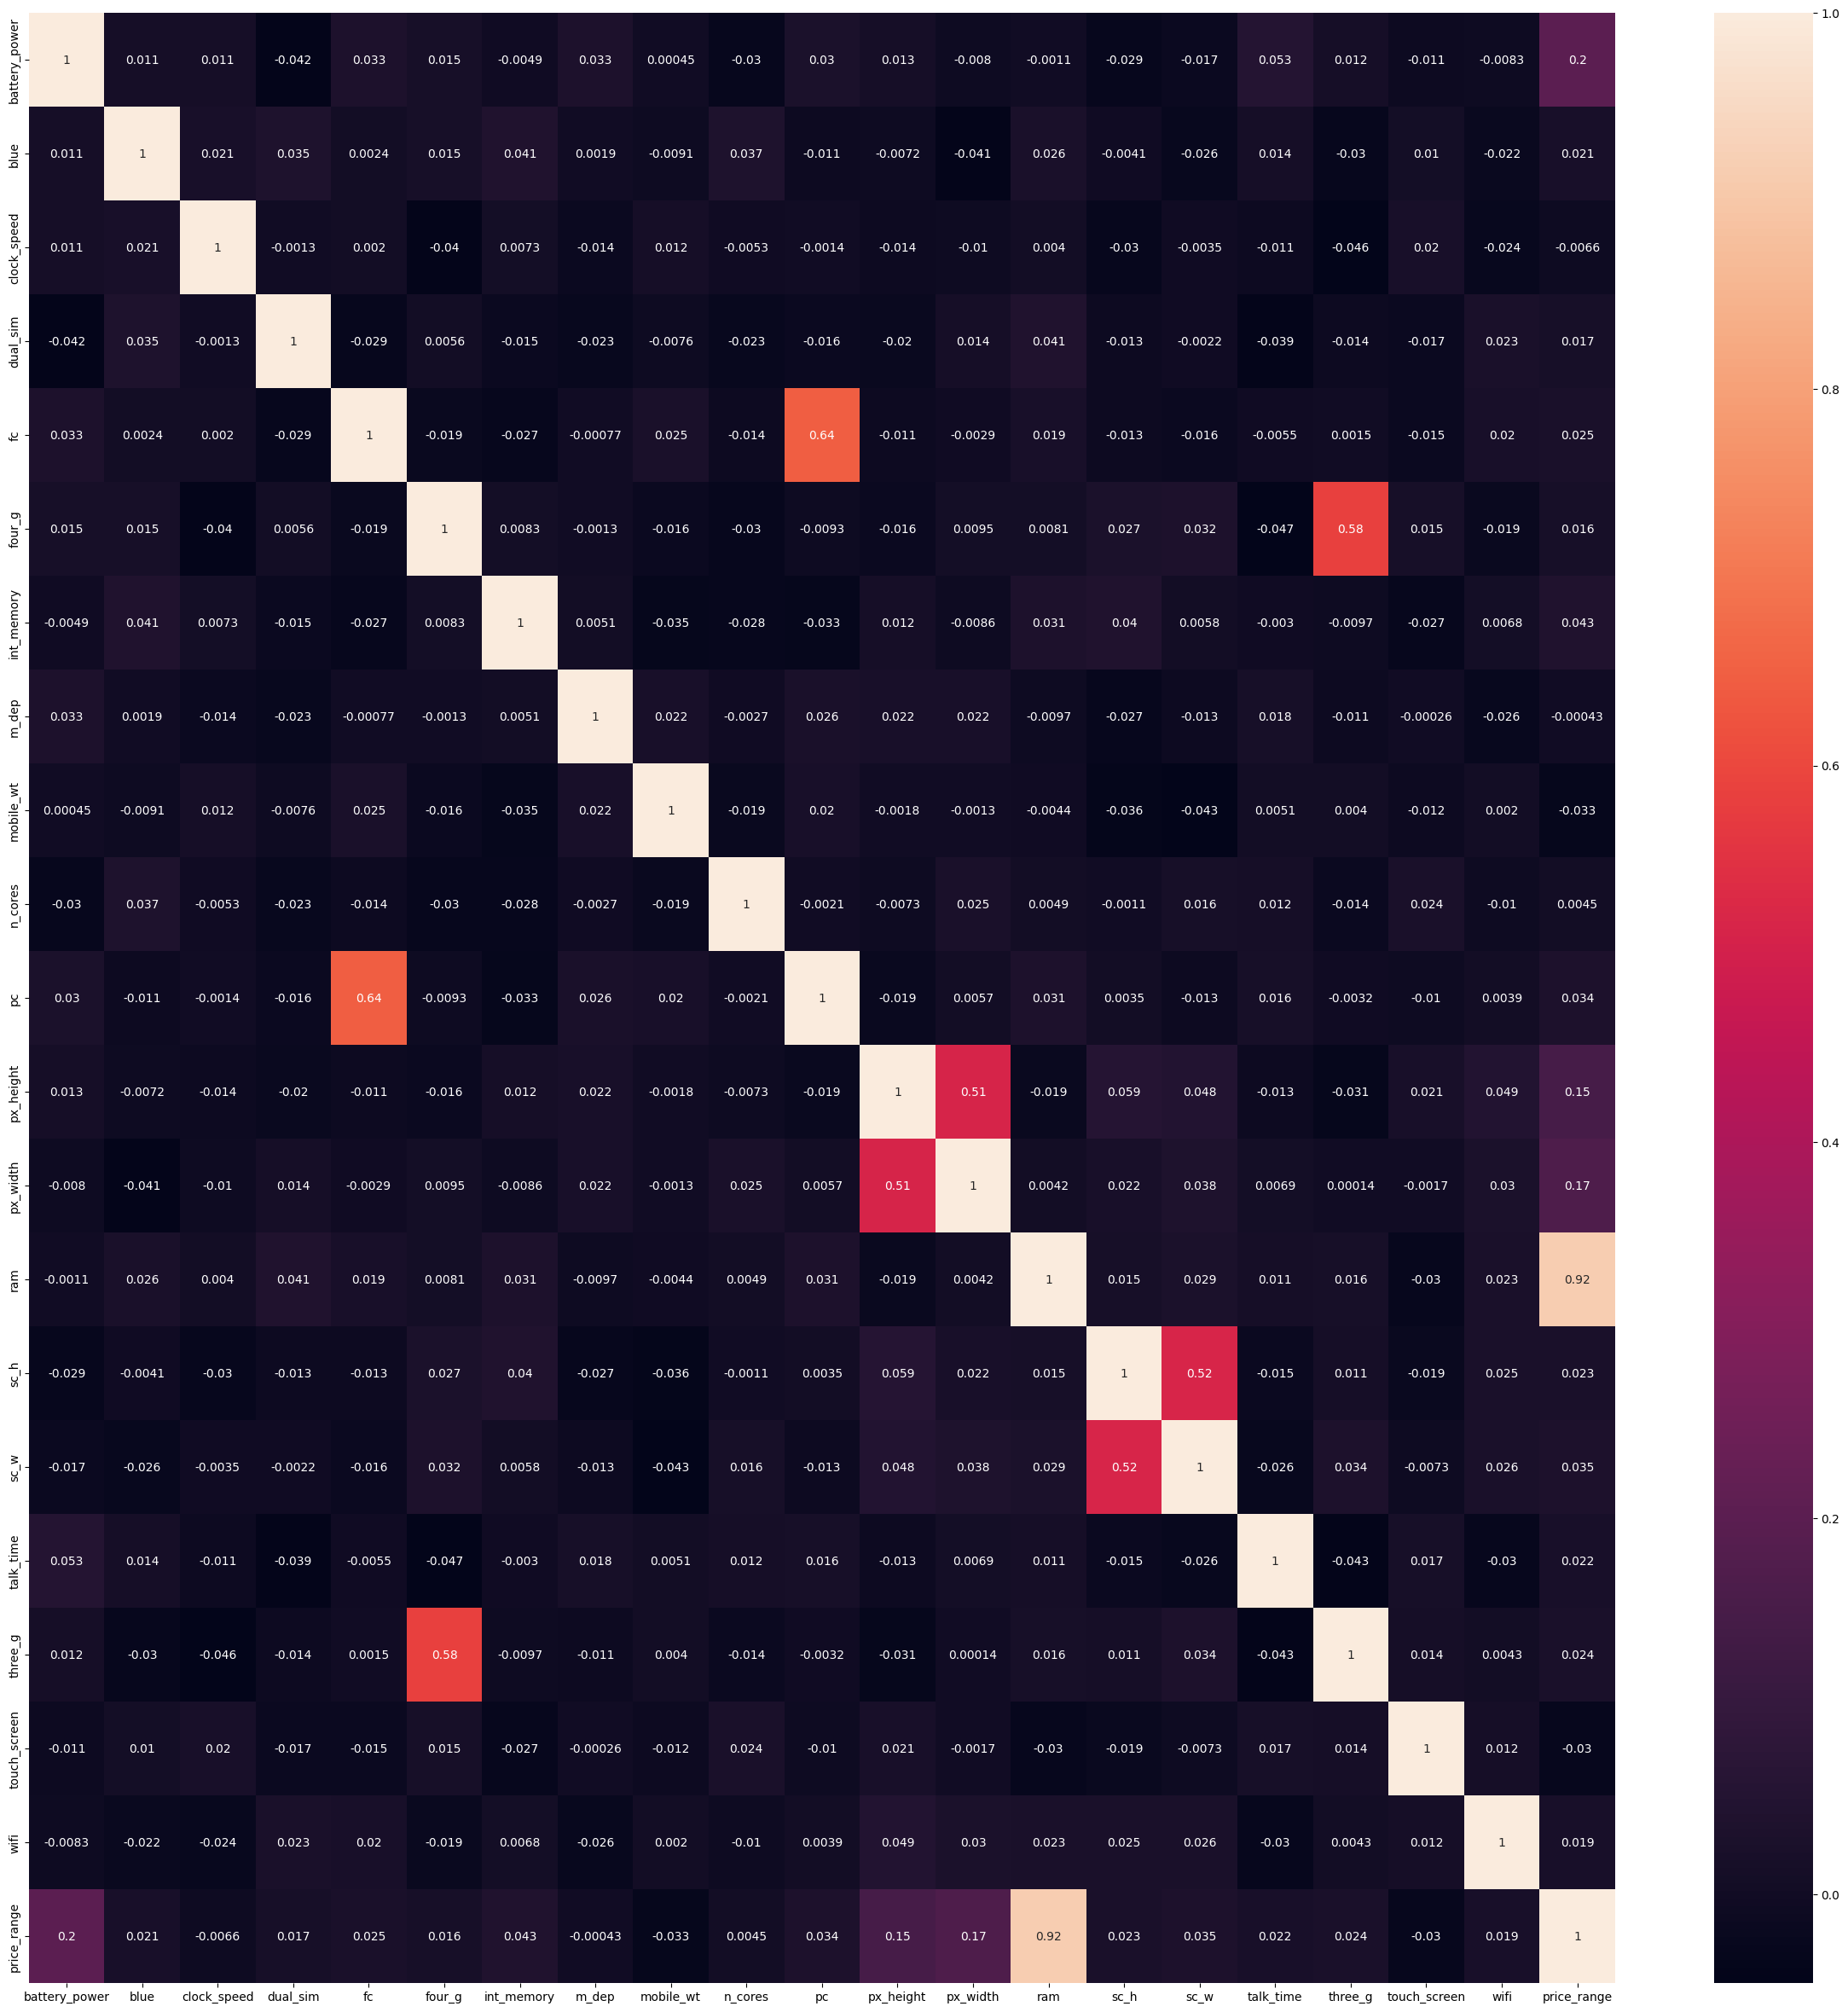

In [26]:
corr = train.corr(method='spearman')#'pearson', 'kendall', 'spearman'
top_features = corr.index
plt.figure(figsize=(30,30))
sns.heatmap(train[top_features].corr(method='pearson'),annot=True)
plt.show()

From the correlation matrix, we see that the target (dependent variable): "price_range" is highly correlated with these features (independent variables):

1.   "ram" corr = 0.92
2.   "battery_power" = 0.2
3.   "px_height" = 0.17
4.   "px_width"  = 0.15

Other features have a correlation value close to zero, so we can drop them cause they don't give us that much information even if it can lead to the worst results. another reason to drop features causes the dimensionality of the data in the features space is 20 with 2000 data samples which can lead to overfitting in the model so to avoid that we should reduce the dimensionality.



**Mutual Information**

In [27]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [28]:
mi_scores = make_mi_scores(X, y)

ram              0.846918
battery_power    0.028429
px_height        0.028166
px_width         0.024549
touch_screen     0.020151
sc_h             0.013973
wifi             0.012472
four_g           0.011006
pc               0.010588
fc               0.005407
n_cores          0.005392
mobile_wt        0.002501
sc_w             0.000067
m_dep            0.000000
blue             0.000000
int_memory       0.000000
dual_sim         0.000000
talk_time        0.000000
three_g          0.000000
clock_speed      0.000000
Name: MI Scores, dtype: float64


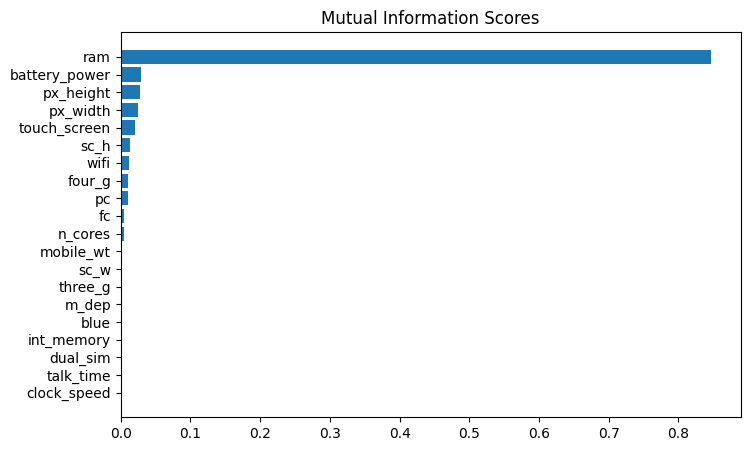

In [29]:
print(mi_scores.head(20))

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(20))

**Features Importance based on Models (RF)**

In [30]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 5.9 MB/s eta 0:00:00


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,VotingClassifier
from catboost import CatBoost,CatBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [32]:
model = RandomForestClassifier()
model.fit(X,y)
RF_ranked_features = pd.Series(model.feature_importances_,index=X.columns)
RF_ranked_features.nlargest(20)

ram              0.488314
battery_power    0.074474
px_width         0.058072
px_height        0.055880
mobile_wt        0.038331
int_memory       0.035861
talk_time        0.030476
sc_w             0.029870
pc               0.028169
clock_speed      0.027020
sc_h             0.025973
fc               0.025316
m_dep            0.022584
n_cores          0.022253
dual_sim         0.006981
touch_screen     0.006858
four_g           0.006239
wifi             0.005997
blue             0.005755
three_g          0.005577
dtype: float64

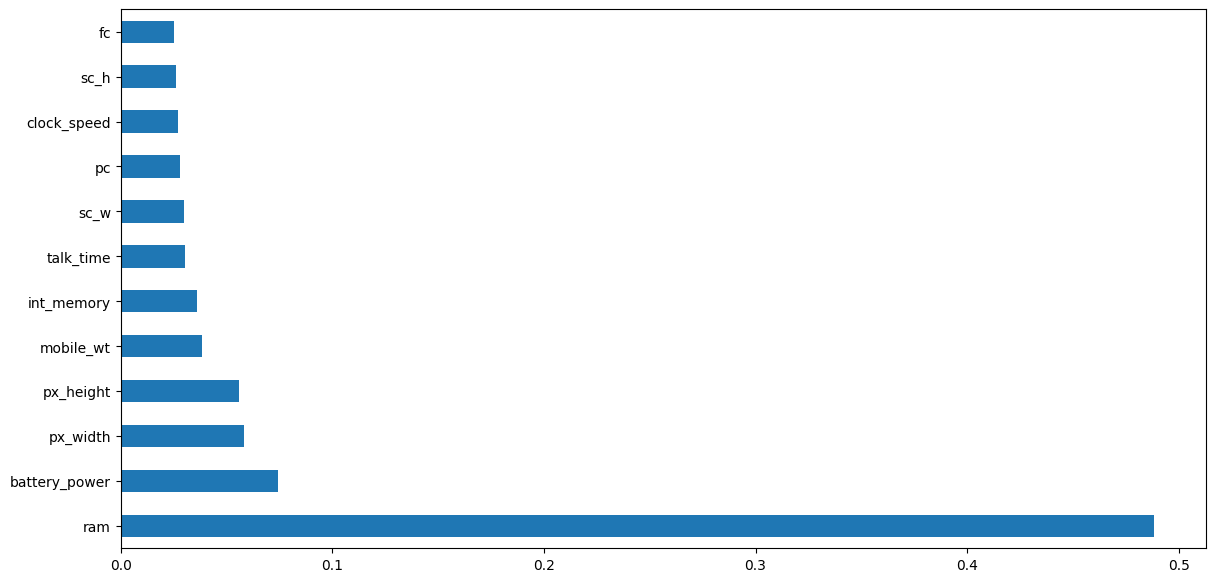

In [33]:
plt.figure(figsize=(14,7))
RF_ranked_features.nlargest(12).plot(kind = "barh")
plt.show()

As we saw from the three feature selection methods, the most important features were:
1.   ram
2.   battery_power
3.   px_height
4.   px_width

So, I'll rely on them in my next steps.

In [34]:
selected_features = ["ram","battery_power" ,"px_height","px_width"]
X = train[selected_features]
y= train["price_range"]

# First shoot for model selection

lazypredict is a library that saves you time when you are trying to figure out the most suitable models for a specific machine-learning project.

In [35]:
! pip install lazypredict

In [36]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

 97%|█████████▋| 28/29 [00:04<00:00,  3.78it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 1400, number of used features: 4
[LightGBM] [Info] Start training from score -1.380596
[LightGBM] [Info] Start training from score -1.397789
[LightGBM] [Info] Start training from score -1.424145
[LightGBM] [Info] Start training from score -1.344330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 29/29 [00:05<00:00,  4.93it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.95,0.95,None,0.95,0.05
QuadraticDiscriminantAnalysis,0.94,0.94,None,0.94,0.05
SVC,0.94,0.94,None,0.93,0.13
NuSVC,0.93,0.93,None,0.93,0.24
LinearDiscriminantAnalysis,0.93,0.93,None,0.93,0.06
ExtraTreesClassifier,0.93,0.93,None,0.92,0.39
XGBClassifier,0.92,0.92,None,0.92,1.36
LGBMClassifier,0.91,0.91,None,0.90,1.10
RandomForestClassifier,0.90,0.90,None,0.90,0.57


As we note these are the models and their scores.

I'll try to boost the results by using the ensemble method on models from the top 7 models.

In [37]:
classifiers_list =[LGBMClassifier,XGBClassifier,LogisticRegression,ExtraTreesClassifier,QuadraticDiscriminantAnalysis,CatBoostClassifier]
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifiers_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

  0%|          | 0/6 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 1400, number of used features: 4
[LightGBM] [Info] Start training from score -1.380596
[LightGBM] [Info] Start training from score -1.397789
[LightGBM] [Info] Start training from score -1.424145
[LightGBM] [Info] Start training from score -1.344330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


 67%|██████▋   | 4/6 [00:01<00:00,  2.70it/s]

Learning rate set to 0.080496
0:	learn: 1.2602799	total: 52ms	remaining: 51.9s
1:	learn: 1.1699981	total: 56.2ms	remaining: 28s
2:	learn: 1.0803626	total: 59.9ms	remaining: 19.9s
3:	learn: 1.0161728	total: 63.9ms	remaining: 15.9s
4:	learn: 0.9573601	total: 67.8ms	remaining: 13.5s
5:	learn: 0.9023555	total: 71.7ms	remaining: 11.9s
6:	learn: 0.8486835	total: 75.5ms	remaining: 10.7s
7:	learn: 0.8038652	total: 79.4ms	remaining: 9.85s
8:	learn: 0.7667494	total: 83.2ms	remaining: 9.16s
9:	learn: 0.7290904	total: 87.9ms	remaining: 8.7s
10:	learn: 0.6903889	total: 91.5ms	remaining: 8.22s
11:	learn: 0.6585162	total: 95.1ms	remaining: 7.83s
12:	learn: 0.6301537	total: 100ms	remaining: 7.62s
13:	learn: 0.6021059	total: 107ms	remaining: 7.5s
14:	learn: 0.5804883	total: 110ms	remaining: 7.24s
15:	learn: 0.5551124	total: 114ms	remaining: 7.01s
16:	learn: 0.5352265	total: 118ms	remaining: 6.8s
17:	learn: 0.5150033	total: 121ms	remaining: 6.61s
18:	learn: 0.4998159	total: 125ms	remaining: 6.44s
19:	le

100%|██████████| 6/6 [00:10<00:00,  1.77s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.95,0.95,None,0.95,0.03
QuadraticDiscriminantAnalysis,0.94,0.94,None,0.94,0.02
CatBoostClassifier,0.94,0.94,None,0.94,8.81
ExtraTreesClassifier,0.93,0.93,None,0.92,0.22
XGBClassifier,0.92,0.92,None,0.92,0.82
LGBMClassifier,0.91,0.91,None,0.90,0.71


here I added a **Cat-boost** classifier and got rid of repeated models (like SVC, NuSVC, and Linear Discriminant Analysis).

# Model Optimization using Optuna and Evaluation and choosig the final model

**Optuna** is an automatic hyperparameter optimization software framework

In [38]:
!pip install optuna
import optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.7 MB/s eta 0:00:00


**CATBoost**

In [39]:
import sklearn.datasets
import sklearn.ensemble
import sklearn.model_selection
from sklearn.model_selection import cross_val_score
def objective(trial):
    cat_params = {
            'iterations': trial.suggest_int('iterations',20, 1000),
            'colsample_bylevel': trial.suggest_float('colsample_bylevel',0,1),
            'depth': trial.suggest_int('depth', 2, 10),
            'learning_rate': trial.suggest_float('learning_rate',0, 1),
            'l2_leaf_reg': trial.suggest_float('l2_leaf_reg',0,30),
            'random_strength': trial.suggest_float('random_strength',0,1),
            'od_type': "Iter",
            'od_wait': trial.suggest_int('od_wait',1,100),
            'bootstrap_type': "Bayesian",
            'grow_policy': 'SymmetricTree',
            'bagging_temperature': trial.suggest_float('l2_leaf_reg',0,30),
            'random_state': trial.suggest_int('random_state',0,3000)
        }

    clf = CatBoostClassifier(**cat_params)
    return cross_val_score(clf, X_train,y_train,cv = 5,n_jobs=-1,).mean()  # Train and evaluate the model.

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2024-04-07 09:12:39,270] A new study created in memory with name: no-name-51d3a3d2-c147-4fc7-ba53-8dd993569628
[I 2024-04-07 09:13:00,006] Trial 0 finished with value: 0.9114285714285716 and parameters: {'iterations': 531, 'colsample_bylevel': 0.7859578823620174, 'depth': 3, 'learning_rate': 0.06556628613969451, 'l2_leaf_reg': 29.25186653724448, 'random_strength': 0.11056988454501215, 'od_wait': 66, 'random_state': 76}. Best is trial 0 with value: 0.9114285714285716.
[I 2024-04-07 09:13:14,518] Trial 1 finished with value: 0.9221428571428572 and parameters: {'iterations': 764, 'colsample_bylevel': 0.3688220732018497, 'depth': 4, 'learning_rate': 0.3084003194016268, 'l2_leaf_reg': 23.273019810007295, 'random_strength': 0.015086136213809387, 'od_wait': 94, 'random_state': 1931}. Best is trial 1 with value: 0.9221428571428572.
[I 2024-04-07 09:13:17,166] Trial 2 finished with value: 0.8957142857142857 and parameters: {'iterations': 315, 'colsample_bylevel': 0.18129342117972014, 'depth'

Accuracy: 0.9228571428571429
Best hyperparameters: {'iterations': 229, 'colsample_bylevel': 0.58481606312702, 'depth': 5, 'learning_rate': 0.7246651141288545, 'l2_leaf_reg': 10.797801114525257, 'random_strength': 0.7425461476598033, 'od_wait': 50, 'random_state': 2820}


In [40]:
cat_params = study.best_params
print(cat_params)

{'iterations': 229, 'colsample_bylevel': 0.58481606312702, 'depth': 5, 'learning_rate': 0.7246651141288545, 'l2_leaf_reg': 10.797801114525257, 'random_strength': 0.7425461476598033, 'od_wait': 50, 'random_state': 2820}


In [41]:
optuna.visualization.plot_optimization_history(study)

This figure shows us the improvement in the model accuracy over the time of hyperparameter tuning using Optuna

In [42]:
optuna.visualization.plot_slice(study)

Every figure shows the changes in specific features against the target during the hyperparameter tuning process.

In [43]:
optuna.visualization.plot_contour(study, params=['iterations', 'learning_rate'])

This figure helps us to imagine where the local and global minimum between two hyperparameters are focused.

**Quadratic Discriminant Analysis**

In [44]:
def objective(trial):
    qda_params = {
            'reg_param': trial.suggest_float('reg_param',0,1),
        }

    clf = QuadraticDiscriminantAnalysis(**qda_params)
    return cross_val_score(clf, X_train,y_train,cv = 5,n_jobs=-1,).mean()  # Train and evaluate the model.

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2024-04-07 09:14:47,074] A new study created in memory with name: no-name-ed15378a-3886-4886-a132-3817ec201c05
[I 2024-04-07 09:14:47,207] Trial 0 finished with value: 0.8335714285714285 and parameters: {'reg_param': 0.603840965105677}. Best is trial 0 with value: 0.8335714285714285.
[I 2024-04-07 09:14:47,280] Trial 1 finished with value: 0.8921428571428571 and parameters: {'reg_param': 0.3250294222294341}. Best is trial 1 with value: 0.8921428571428571.
[I 2024-04-07 09:14:47,359] Trial 2 finished with value: 0.8264285714285714 and parameters: {'reg_param': 0.6592519433991365}. Best is trial 1 with value: 0.8921428571428571.
[I 2024-04-07 09:14:47,435] Trial 3 finished with value: 0.8428571428571429 and parameters: {'reg_param': 0.5376716329869817}. Best is trial 1 with value: 0.8921428571428571.
[I 2024-04-07 09:14:47,550] Trial 4 finished with value: 0.9292857142857143 and parameters: {'reg_param': 0.13803522913875466}. Best is trial 4 with value: 0.9292857142857143.
[I 2024-04-

Accuracy: 0.9292857142857143
Best hyperparameters: {'reg_param': 0.13803522913875466}


In [45]:
qda_params = study.best_params
print(qda_params)

{'reg_param': 0.13803522913875466}


In [46]:
optuna.visualization.plot_optimization_history(study)

In [47]:
optuna.visualization.plot_slice(study)

**Logistic Regression**

In [48]:
def objective(trial):
    lr_params = {
            'C': trial.suggest_float('C',0,1),
            'solver' : trial.suggest_categorical('solver',['lbfgs', 'liblinear', 'sag', 'saga']),
        }

    clf = LogisticRegression(**lr_params)
    return cross_val_score(clf, X_train,y_train,cv = 5,n_jobs=-1,).mean()  # Train and evaluate the model.

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2024-04-07 09:14:48,357] A new study created in memory with name: no-name-c900b14c-088a-4c19-8e20-c2daa921aa6c
[I 2024-04-07 09:14:48,469] Trial 0 finished with value: 0.9528571428571428 and parameters: {'C': 0.8094468315959948, 'solver': 'sag'}. Best is trial 0 with value: 0.9528571428571428.
[I 2024-04-07 09:14:48,558] Trial 1 finished with value: 0.9485714285714286 and parameters: {'C': 0.4252976676514001, 'solver': 'sag'}. Best is trial 0 with value: 0.9528571428571428.
[I 2024-04-07 09:14:48,645] Trial 2 finished with value: 0.9528571428571428 and parameters: {'C': 0.8631106429796728, 'solver': 'sag'}. Best is trial 0 with value: 0.9528571428571428.
[I 2024-04-07 09:14:48,710] Trial 3 finished with value: 0.7714285714285715 and parameters: {'C': 0.19669093895847378, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9528571428571428.
[I 2024-04-07 09:14:48,793] Trial 4 finished with value: 0.9528571428571428 and parameters: {'C': 0.7814674947658736, 'solver': 'sag'}. Best is

Accuracy: 0.9535714285714285
Best hyperparameters: {'C': 0.917418025589766, 'solver': 'sag'}


In [49]:
lr_params = study.best_params
print(lr_params)

{'C': 0.917418025589766, 'solver': 'sag'}


In [50]:
optuna.visualization.plot_optimization_history(study)

In [51]:
optuna.visualization.plot_slice(study)

**Evaluation**

In [53]:
# cross_val_score(lr_clf, X_train,y_train,cv = 5,n_jobs=-1,).mean()

NameError: name 'lr_clf' is not defined

In [ ]:
lr_clf = LogisticRegression(**lr_params)
qda_clf = QuadraticDiscriminantAnalysis(**qda_params)
cat_clf = CatBoostClassifier(**cat_params)
ens_clf = VotingClassifier(estimators=[("lr",lr_clf),("qda",qda_clf),("cat",cat_clf)], voting='soft')
cross_val_score(ens_clf, X_train,y_train,cv = 5,n_jobs=-1,).mean()

In [ ]:
ens_clf.fit(X_train,y_train)
lr_clf.fit(X_train,y_train)

In [ ]:
y_pred = ens_clf.predict(X_test)
from sklearn.metrics import f1_score, accuracy_score
print(f"F1 Score on validation set: {f1_score(y_test, y_pred,average='weighted')}")
print(f"Accuracy_scoreon validation set: {accuracy_score(y_test, y_pred)}")

In [ ]:
y_pred = lr_clf.predict(X_test)
from sklearn.metrics import f1_score, accuracy_score
print(f"F1 Score on validation set: {f1_score(y_test, y_pred,average='weighted')}")
print(f"Accuracy_scoreon validation set: {accuracy_score(y_test, y_pred)}")

We note that in this project the **ensemble method (Votting) didn't improve our results.** As we know **ensemble methods could help us to avoid overfitting the data.**

So we will choose the **lr_clf as our final classification model**.


**confusion matrix**

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(ens_clf,X_train,y_train,cv=5)
conf_mx = confusion_matrix(y_train,y_train_pred)
row_sums = conf_mx.sum(axis= 1 , keepdims=True)
norm_conf_mx = np.round(conf_mx/row_sums*100, 1)

In [ ]:
print(norm_conf_mx)

In [ ]:
plt.Figure(figsize=(10,10))
plt.matshow(norm_conf_mx,cmap= plt.cm.gray)
plt.show()

to show the erorrs more clearly we set the diagonal to zero

In [ ]:
np.fill_diagonal(norm_conf_mx,0)

In [ ]:
plt.Figure(figsize=(10,10))
plt.matshow(norm_conf_mx,cmap= plt.cm.gray)
plt.show()

As we see the brighter the cell the more errors in it.

# Refactor the process into pipeline

In [54]:
FOLDER_PATH = Path("/content/drive/MyDrive/maids AI test/")
train = pd.read_csv(FOLDER_PATH.joinpath("train.csv"))
test = pd.read_csv(FOLDER_PATH.joinpath("test.csv"))

In [55]:
target = "price_range"
X = train.drop([target], axis =1)
y = train[target]

In [56]:
from sklearn.base import BaseEstimator,TransformerMixin
class nan_the_none_real_zeros(BaseException,TransformerMixin):
  def __init__(self,replaced_val=0):
    print('Initialising transformer...')
    self.replaced_val = replaced_val
  def fit(self,X,y=None):
    self.val = np.NaN
    return self
  def transform(self, X):
    print ('replacing impossible px_height & px_wight values')
    if 'id' in X.columns:
      X.drop("id",axis =1, inplace = True)
    X.px_height.replace(self.replaced_val,self.val, inplace=True)
    X.px_width.replace(self.replaced_val,self.val, inplace=True)
    return X


class columns_selection (BaseException,TransformerMixin):
  def __init__(self,selected_features = ["ram","battery_power" ,"px_height","px_width"]):
    self.selected_features = selected_features
    self.all_columns = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
                        'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
                        'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']
  def fit(self,X,y=None):
    pass
    return self
  def transform(self, X):
    X = pd.DataFrame(X,columns =self.all_columns)
    X = X[self.selected_features]
    return X


In [57]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('Data_corrector', nan_the_none_real_zeros()),
    ('Scaler',StandardScaler()),
    ('Imputer',KNNImputer()),
    ('Featuer Selection',columns_selection()),
    ('LR model',LogisticRegression(**lr_params))])
pipe.fit (X, y)


Initialising transformer...
replacing impossible px_height & px_wight values


Pipeline(steps=[('Data_corrector', nan_the_none_real_zeros()),
                ('Scaler', StandardScaler()), ('Imputer', KNNImputer()),
                ('Featuer Selection', columns_selection()),
                ('LR model',
                 LogisticRegression(C=0.917418025589766, solver='sag'))])

In [58]:
y_pred_p = pipe.predict (test)
y_pred_p[:5]

replacing impossible px_height & px_wight values


array([3, 3, 3, 3, 1])

**Save the Pipeline**

In [63]:
import joblib
joblib.dump(pipe, 'pipe.joblib')

['pipe.joblib']

In [60]:
pipeline = joblib.load('pipe.joblib')

Initialising transformer...


In [ ]:
pipeline.predict (test)